In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):
for i , city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | sao joao da barra
Processing Record 3 of Set 1 | wasilla
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | japura
Processing Record 7 of Set 1 | henties bay
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | brovst
Processing Record 10 of Set 1 | caravelas
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mahibadhoo
Processing Record 14 of Set 1 | bowen
Processing Record 15 of Set 1 | gravdal
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | altamont
Processing Record 18 of Set 1 | buchanan
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | mata

Processing Record 41 of Set 4 | boa vista
Processing Record 42 of Set 4 | kenai
Processing Record 43 of Set 4 | raudeberg
Processing Record 44 of Set 4 | letlhakeng
Processing Record 45 of Set 4 | martapura
Processing Record 46 of Set 4 | kudahuvadhoo
Processing Record 47 of Set 4 | yar-sale
Processing Record 48 of Set 4 | ambatondrazaka
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | tamandare
Processing Record 3 of Set 5 | manono
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | the valley
Processing Record 6 of Set 5 | chagda
City not found. Skipping...
Processing Record 7 of Set 5 | abha
Processing Record 8 of Set 5 | kerman
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 5 | bom jesus da lapa
Processing Record 11 of Set 5 | maudaha
Processing Record 12 of Set 5 | mehamn
Processing Record 13 of Set 5 | iquitos
Processing Record 14 

Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | xinzhou
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | xichang
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | talcahuano
Processing Record 37 of Set 8 | yuncheng
Processing Record 38 of Set 8 | chapais
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 42 of Set 8 | conakry
Processing Record 43 of Set 8 | staryy biser
City not found. Skipping...
Processing Record 44 of Set 8 | masunga
Processing Record 45 of Set 8 | venice
Processing Record 46 of Set 8 | neiafu
Processing Record 47 of Set 8 | port-cartier
Processing Record 48 of Set 8 | deputatskiy
Processing Record 49 of Set 8 | alekseyevsk
Processing Record 50 of Set 8 | moroni
Processing Record 1 of Set 9 | yaan
Processing Record 2 of Set 9 | athens


Processing Record 13 of Set 12 | yuanping
Processing Record 14 of Set 12 | dokka
Processing Record 15 of Set 12 | manaus
Processing Record 16 of Set 12 | ekhabi
Processing Record 17 of Set 12 | rochegda
Processing Record 18 of Set 12 | waingapu
Processing Record 19 of Set 12 | chernyshevskiy
Processing Record 20 of Set 12 | krotoszyn
Processing Record 21 of Set 12 | fortuna foothills
Processing Record 22 of Set 12 | coihaique
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | collipulli
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | klyuchi
Processing Record 28 of Set 12 | wad madani
Processing Record 29 of Set 12 | chara
Processing Record 30 of Set 12 | barroso
Processing Record 31 of Set 12 | gamba
Processing Record 32 of Set 12 | rio grande
Processing Record 33 of Set 12 | ternate
Processing Record 34 of Set 12 | kanel
Processing Record 35 of Set 12 | sebu
Processing Record 36 of Set 12 | maun
Proc

In [7]:
len(city_data)

563

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,10.09,96,100,12.86,GL,21-04-10 02:57:42
1,Sao Joao Da Barra,-21.6403,-41.0511,73.18,71,0,4.76,BR,21-04-10 02:59:59
2,Wasilla,61.5814,-149.4394,19.99,38,1,9.22,US,21-04-10 02:58:17
3,Champerico,14.3000,-91.9167,66.99,96,34,7.85,GT,21-04-10 03:02:37
4,Saskylakh,71.9167,114.0833,-2.27,90,35,1.90,RU,21-04-10 03:02:37
5,Japura,-0.3167,102.3500,82.58,75,100,3.11,ID,21-04-10 02:59:33
6,Henties Bay,-22.1160,14.2845,76.86,44,0,6.42,NA,21-04-10 03:02:38
7,Ahipara,-35.1667,173.1667,68.27,94,93,12.97,NZ,21-04-10 03:02:38
8,Brovst,57.0956,9.5280,33.80,86,20,11.50,DK,21-04-10 03:02:38
9,Caravelas,-17.7125,-39.2481,72.64,89,33,6.87,BR,21-04-10 03:02:39


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,21-04-10 02:57:42,72.7868,-56.1549,10.09,96,100,12.86
1,Sao Joao Da Barra,BR,21-04-10 02:59:59,-21.6403,-41.0511,73.18,71,0,4.76
2,Wasilla,US,21-04-10 02:58:17,61.5814,-149.4394,19.99,38,1,9.22
3,Champerico,GT,21-04-10 03:02:37,14.3000,-91.9167,66.99,96,34,7.85
4,Saskylakh,RU,21-04-10 03:02:37,71.9167,114.0833,-2.27,90,35,1.90


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

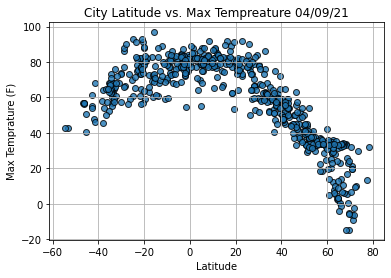

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
           edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Tempreature " + time.strftime("%x"))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

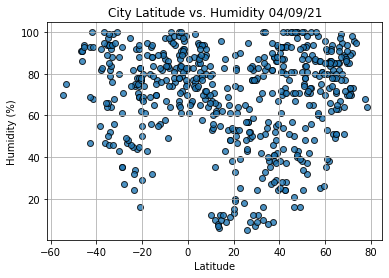

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

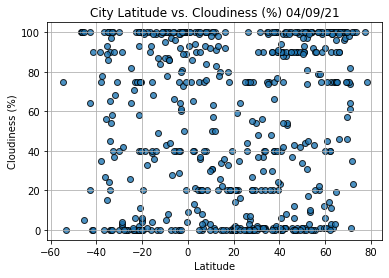

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

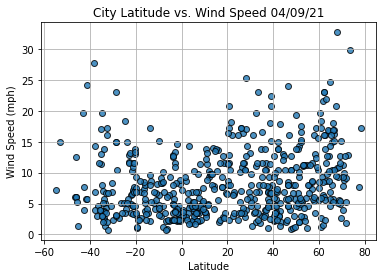

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

In [70]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates, fontsize = 15 , color = "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"r-value = {r_value:.2f}")




In [31]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,21-04-10 02:57:42,72.7868,-56.1549,10.09,96,100,12.86
1,Sao Joao Da Barra,BR,21-04-10 02:59:59,-21.6403,-41.0511,73.18,71,0,4.76
2,Wasilla,US,21-04-10 02:58:17,61.5814,-149.4394,19.99,38,1,9.22
3,Champerico,GT,21-04-10 03:02:37,14.3000,-91.9167,66.99,96,34,7.85
4,Saskylakh,RU,21-04-10 03:02:37,71.9167,114.0833,-2.27,90,35,1.90


In [32]:
index13 = city_data_df.loc[13]

In [33]:
print(index13)

City                      Bowen
Country                      AU
Date          21-04-10 03:02:40
Lat                    -20.0167
Lng                     148.233
Max Temp                   87.8
Humidity                     55
Cloudiness                    5
Wind Speed                 9.22
Name: 13, dtype: object


In [34]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
558     True
559     True
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [35]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

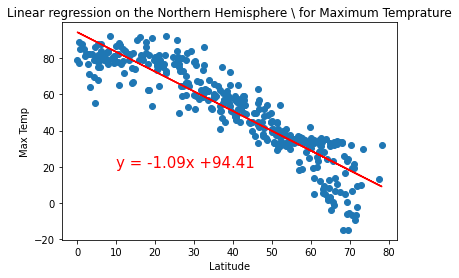

r-value = -0.91


In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear regression on the Northern Hemisphere \ for Maximum Temprature", "Max Temp", (10,20))

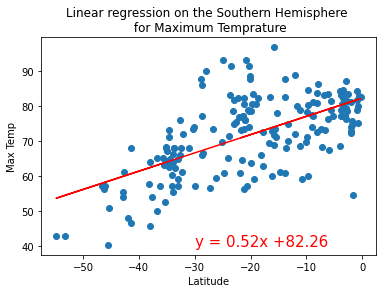

r-value = 0.63


In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear regression on the Southern Hemisphere \n for Maximum Temprature", "Max Temp", (-30,40))

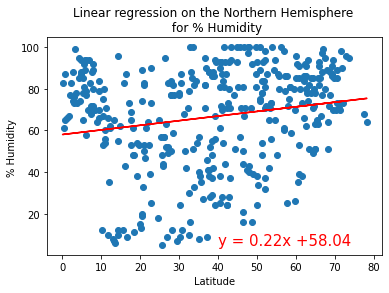

r-value = 0.19


In [72]:
x_values = northern_hemi_df["Lat"]
y_values_hum_n = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values_hum_n, "Linear regression on the Northern Hemisphere \n for % Humidity", "% Humidity ", (40,5))

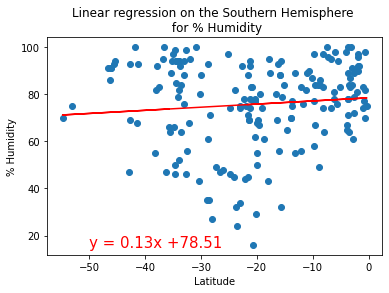

r-value = 0.10


In [71]:
x_values = southern_hemi_df["Lat"]
y_values_hum_s = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values_hum_s, "Linear regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,15))

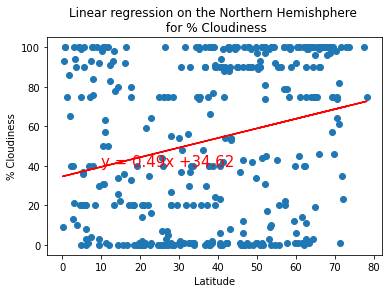

r-value = 0.25


In [75]:
x_values = northern_hemi_df["Lat"]
y_values_cloud_n = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values_cloud_n, "Linear regression on the Northern Hemishphere \n for % Cloudiness", "% Cloudiness", (10,40))

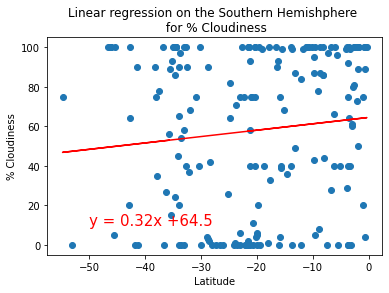

r-value = 0.11


In [77]:
x_values = southern_hemi_df["Lat"]
y_values_cloud_s = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values_cloud_s, "Linear regression on the Southern Hemishphere \n for % Cloudiness", "% Cloudiness", (-50,10))

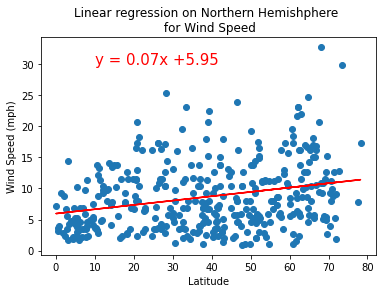

r-value = 0.26


In [79]:
x_values = northern_hemi_df["Lat"]
y_values_wind_n = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values_wind_n, "Linear regression on Northern Hemishphere \n for Wind Speed", "Wind Speed (mph)",(10,30))

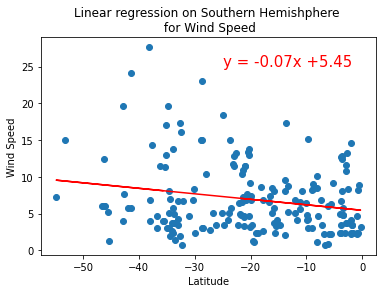

r-value = -0.21


In [82]:
x_values = southern_hemi_df["Lat"]
y_values_wind_s = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values_wind_s, "Linear regression on Southern Hemishphere \n for Wind Speed","Wind Speed",(-25,25))